# Reinforcement Learning Game Agent

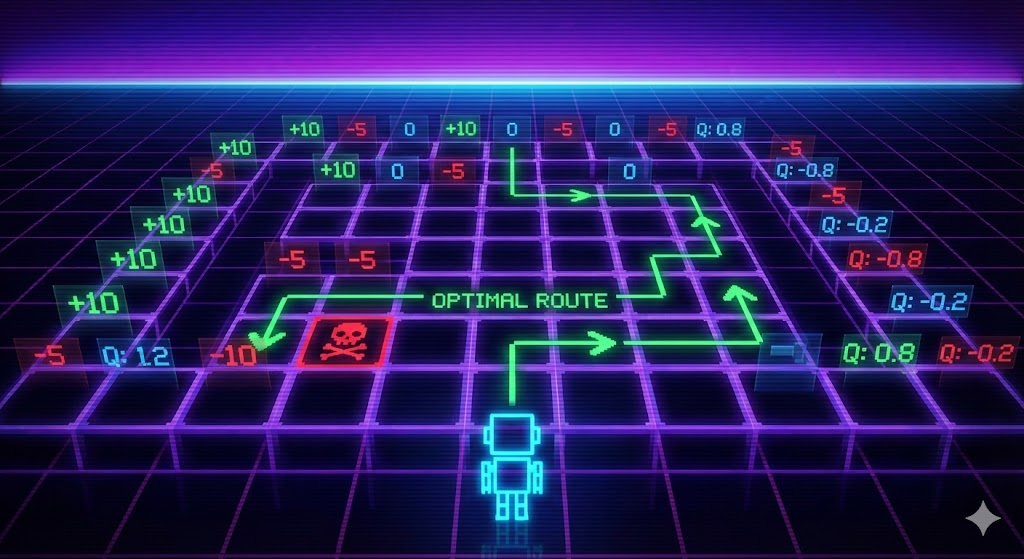



## 1. Problem Statement
We aim to build an agent that can navigate a **GridWorld**—a **5 × 5** map where it must find a **Goal (+10)** while avoiding a **Pit (-10)**. The agent starts with **no prior knowledge** and must learn the best path through **trial and error** using **Q-Learning**.

---

## 2. Main Objectives
- **Understand MDPs:** Model the game as a series of **States**, **Actions**, and **Rewards**.  
- **Exploration vs. Exploitation:** Implement an **Epsilon-Greedy** strategy to balance **trying new paths** versus **using known good paths**.  
- **Q-Table Mastery:** Build a **memory table** storing the estimated value of every action in every state.  
- **Policy Comparison:** Demonstrate that a **learned agent** significantly outperforms a **random agent**.


## Section 1: The Environment (GridWorld)

**Topic:** Defining the Rules of the World  

**Description:** We build a simple **5 × 5 grid** where the agent starts at **(0,0)** and aims to reach the **Goal at (4,4)** while avoiding hazards like pits.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class SimpleGridWorld:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)
        self.goal = (size-1, size-1)
        self.pit = (size-2, size-1) # One step before the goal
        self.actions = ['up', 'down', 'left', 'right']

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        r, c = self.state
        if action == 'up': r = max(0, r-1)
        elif action == 'down': r = min(self.size-1, r+1)
        elif action == 'left': c = max(0, c-1)
        elif action == 'right': c = min(self.size-1, c+1)

        self.state = (r, c)

        # Define Rewards
        if self.state == self.goal:
            return self.state, 10, True # Goal reached!
        elif self.state == self.pit:
            return self.state, -10, True # Fell in pit!
        else:
            return self.state, -1, False # Small penalty for every step taken (incentivizes speed)

env = SimpleGridWorld()
print("Environment Initialized.")

Environment Initialized.


Why we did this: In RL, the "Environment" is the teacher. We add a small penalty $(-1)$ for every step to force the agent to find the shortest path, not just any path

## Section 2: The "Brain" (Q-Learning Algorithm)

**Topic:** Building the Q-Table  

**Description:** We create a **Q-Table** where **rows represent states** (grid coordinates) and **columns represent actions** (up, down, left, right). Initially, all values are set to **zero**, allowing the agent to learn action values through experience.


In [3]:
# Initialize Q-Table with zeros
# State is (row, col), so we have size * size states
q_table = np.zeros((env.size, env.size, len(env.actions)))

# Hyperparameters
learning_rate = 0.1
discount_factor = 0.95
epsilon = 1.0  # Start with 100% Exploration
epsilon_decay = 0.995
min_epsilon = 0.01

print(f"Q-Table Shape: {q_table.shape} (States x Actions)")

Q-Table Shape: (5, 5, 4) (States x Actions)


Why we did this: The Q-Table is the agent’s memory. Over time, it will fill these zeros with scores. A high score means "moving right in this cell is a great idea

## Section 3: Training (Exploration vs. Exploitation)

**Topic:** The Epsilon-Greedy Loop  

**Description:** We train the agent over **1,000 episodes**. Initially, the agent moves **randomly** to explore the environment. As it gathers experience, it gradually **exploits** the Q-Table by following the actions with the **highest learned values**.


In [4]:
episodes = 1000
history = []

for i in range(episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # Choose action: Explore or Exploit?
        if np.random.uniform(0, 1) < epsilon:
            action_idx = np.random.randint(0, len(env.actions)) # Random
        else:
            action_idx = np.argmax(q_table[state[0], state[1]]) # Best known

        next_state, reward, done = env.step(env.actions[action_idx])

        # Update Q-Table (The Bellman Equation)
        old_value = q_table[state[0], state[1], action_idx]
        next_max = np.max(q_table[next_state[0], next_state[1]])

        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
        q_table[state[0], state[1], action_idx] = new_value

        state = next_state
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay) # Reduce randomness
    history.append(total_reward)

print("Training Complete.")

Training Complete.


Why we did this: This loop is where the "learning" happens. We use the Bellman Equation to update the Q-values. It looks at the reward received plus the future potential of the next state.

## Section 4: Performance Evaluation

**Topic:** Comparing Random vs. Learned Policy  

**Description:** We plot the agent's **rewards over time**. Initially, the agent scores poorly, often falling into pits. Over time, as learning progresses, it achieves **high and consistent rewards**, demonstrating that the **learned policy** outperforms random actions.


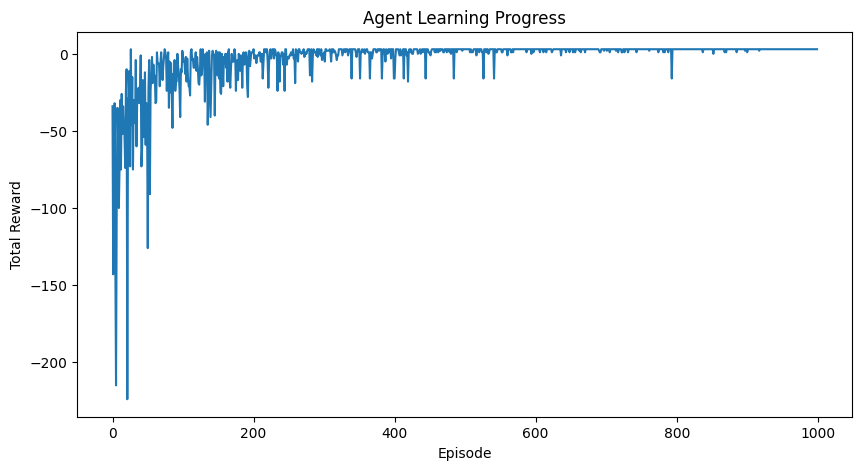

Step 1: Agent moved to (1, 0)
Step 2: Agent moved to (1, 1)
Step 3: Agent moved to (2, 1)
Step 4: Agent moved to (2, 2)
Step 5: Agent moved to (3, 2)
Step 6: Agent moved to (3, 3)
Step 7: Agent moved to (4, 3)
Step 8: Agent moved to (4, 4)


In [5]:
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.title('Agent Learning Progress')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# Test the agent for one episode
state = env.reset()
steps = 0
done = False
while not done and steps < 20:
    action_idx = np.argmax(q_table[state[0], state[1]])
    state, reward, done = env.step(env.actions[action_idx])
    steps += 1
    print(f"Step {steps}: Agent moved to {state}")

Why we did this: The upward trend in the graph is proof of "Intelligence." It shows the agent learned to avoid the pit and navigate directly to the goal.

## Section 5: Visualizing the Q-Values (Stretch Goal)

**Topic:** Heatmap of Intelligence  

**Description:** We create a **heatmap** showing the **maximum Q-value** for each cell in the grid. This visualizes the **desirability** of each position, highlighting which states the agent considers most valuable for reaching the goal.


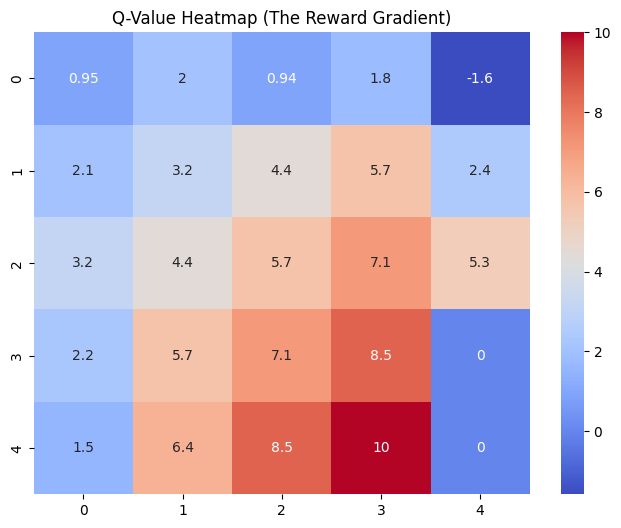

In [6]:
# Extract the max Q-value per state to see the "value map"
value_map = np.max(q_table, axis=2)

plt.figure(figsize=(8, 6))
sns.heatmap(value_map, annot=True, cmap='coolwarm')
plt.title('Q-Value Heatmap (The Reward Gradient)')
plt.show()

In [7]:
import numpy as np
import pickle

# 1. Save the Q-Table
with open('agent_q_table.pkl', 'wb') as f:
    pickle.dump(q_table, f)

print("Q-Table saved! This is the brain of your agent.")

Q-Table saved! This is the brain of your agent.
